
#### MBD 2022-2023

# Recommender Systems Individual Project

# Receipe Recommender System 

**Libraries**

In [2]:
# Please install these libraries before importing other libraries
# !pip install networkx
!pip install scikit-surprise
!pip install ieseg_recsys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing libraries

#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
import string
from pandas import DataFrame
from numpy import array
from matplotlib import pyplot
from collections import Counter
from pandas import read_csv
pd.options.display.max_colwidth = 1000
import re
import networkx as nx 

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as snsb

# Nautural Language processing libraries
import spacy 
from wordcloud import *
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.snowball import SnowballStemmer

# Recommender Tools packages
from surprise import *
from surprise import accuracy

# Evaluation
from ieseg_recsys import *

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats.stats import pearsonr
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import *
from sklearn.model_selection import GridSearchCV

import sys

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-3-8bde67775933>:60: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


**Local Directory**

In [4]:
# directory = r"C:\Users\ythonukunuru\Desktop\Recommendation Tools\Group Project\recommender-systems-2023"

In [5]:
# Mount your google drive to read data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Data**

In [6]:
# Importing datasets
metadata = read_csv("/content/drive/MyDrive/Recommendation Tools /metadata.csv")
train = read_csv("/content/drive/MyDrive/Recommendation Tools /train.csv")
kg_sub = read_csv("/content/drive/MyDrive/Recommendation Tools /sample_submission.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Pre-processing

### Table1: metadata

In [8]:
# Inspecting dataframe 'metadata'
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  object
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  object
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 21.2+ MB


name        id  minutes contributor_id  \
0     buttermilk pie in cornmeal pastry  R5936467      100       U1964167   
1       barbecued chicken thighs au vin  R7429536        0        U237481   
2  20 000 prize winning chili con carne  R9643197      175       U7476978   
3        chocolatey raisin chip cookies  R8459344       57        U237481   
4                        grape nuts pie  R3247719       75        U237481   

    submitted  \
0  1999-08-06   
1  1999-08-06   
2  1999-08-06   
3  1999-08-06   
4  1999-08-06   

                                                                                                                                                                                                                                                                                 tags  \
0                                                                                        ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'pies-and-tarts', 'desserts', 'eggs-dairy', 'oven', 'pies', 'dietary', 'equipment', '4-hours-or-less']   
1                               ['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'main-dish', 'poultry', 'barbecue', 'chicken', 'stove-top', 'dietary', 'gluten-free', 'free-of-something', 'meat', 'chicken-thighs-legs', 'equipment', 'grilling']   
2  ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'main-dish', 'beef', 'pork', 'holiday-event', 'winter', 'chili', 'stove-top', 'dietary', 'seasonal', 'ground-beef', 'meat', 'kwanzaa', 'equipment', 'number-of-servings', '4-hours-or-less']   
3                             ['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'drop-cookies', 'desserts', 'oven', 'cookies-and-brownies', 'chocolate', 'dietary', 'low-sodium', 'low-in-something', 'equipment', 'number-of-servings']   
4                                                        ['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'healthy', 'pies-and-tarts', 'desserts', 'oven', 'pies', 'dietary', 'pasta-rice-and-grains', 'equipment', 'number-of-servings', '4-hours-or-less']   

                                         nutrition  n_steps  \
0     [459.0, 29.0, 163.0, 13.0, 21.0, 32.0, 20.0]       24   
1        [273.4, 24.0, 29.0, 3.0, 33.0, 23.0, 3.0]       15   
2     [558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0]       17   
3            [83.5, 4.0, 34.0, 1.0, 2.0, 2.0, 4.0]       14   
4  [2257.0, 76.0, 982.0, 61.0, 52.0, 133.0, 150.0]        6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       steps  \
0  ['for pastry: sift together flour and salt', 'stir in cornmeal', 'cut in shortening until mixture resembles fine crumbs', 'stir in grated cheddar cheese', 'sprinkle water over mixture gradually , mixing lightly with fork', 'shape into ball', 'flatten on lightly floured surface', 'roll to about 1 / 8" thickness', 'line 9" pie pan', 'trim and flute edge', 'fill and bake as directed below', 'for filling: separate 3 eggs and

In [9]:
# Baring 'description' column, remaining columns do not have null values. 

In [10]:
# Drop few columns including 'description columns
metadata = metadata.drop(['minutes', 'contributor_id', 'submitted', 'tags', 'n_steps', 'steps', 'description'],axis = 1, errors='ignore')
metadata.columns

Index(['name', 'id', 'nutrition', 'ingredients', 'n_ingredients'], dtype='object')

In [11]:
# Check number of unique recipies in metadata
metadata['id'].nunique()

231637

In [12]:
# 'nutrition' column is not explaining the meaning of each value. So, we are assigning names of nutrition values and converting this column to numtiple columns of 
# each representing corresponding nutrition value
metadata[['calories','fat','sugar','sodium','protein','saturated fat','carbohydrates']] = metadata.nutrition.str.split(",",expand=True)
metadata.head(5)

name        id  \
0     buttermilk pie in cornmeal pastry  R5936467   
1       barbecued chicken thighs au vin  R7429536   
2  20 000 prize winning chili con carne  R9643197   
3        chocolatey raisin chip cookies  R8459344   
4                        grape nuts pie  R3247719   

                                         nutrition  \
0     [459.0, 29.0, 163.0, 13.0, 21.0, 32.0, 20.0]   
1        [273.4, 24.0, 29.0, 3.0, 33.0, 23.0, 3.0]   
2     [558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0]   
3            [83.5, 4.0, 34.0, 1.0, 2.0, 2.0, 4.0]   
4  [2257.0, 76.0, 982.0, 61.0, 52.0, 133.0, 150.0]   

                                                                                                                                                                                                                                                       ingredients  \
0                                                                                          ['flour', 'salt', 'cornmeal', 'shortening', 'cheddar cheese', 'water', 'eggs', 'sugar', 'butter', 'buttermilk', 'lemon zest', 'lemon juice', 'egg whites', 'egg white']   
1                                                                                                    ['chicken thighs', 'vegetable oil', 'butter', 'shallots', 'garlic', 'red currant jelly', 'red wine', 'chicken stock', 'orange rind', 'dry mustard', 'ginger']   
2  ['lean chuck', 'lean pork', 'onion', 'garlic cloves', 'budweiser beer', 'hunts tomato sauce', 'water', 'chili powder', 'cumin', 'bouillon', 'oregano leaves', 'paprika', 'sugar', 'unsweetened cocoa', 'coriander', 'louisiana hot sauce', 'flour', 'cornmeal']   
3                                                       ['brown sugar', 'sugar', 'canola oil', 'vanilla', 'egg whites', 'water', 'flour', 'nonfat dry milk powder', 'baking soda', 'unsweetened cocoa powder', 'semi-sweet chocolate chips', 'raisins', 'walnuts']   
4                                                                                                                                                                  ['grape-nuts cereal', 'water', 'eggs', 'sugar', 'dark corn syrup', 'salt', 'vanilla', 'butter']   

   n_ingredients calories    fat   sugar sodium protein saturated fat  \
0             14   [459.0   29.0   163.0   13.0    21.0          32.0   
1             11   [273.4   24.0    29.0    3.0    33.0          23.0   
2             18   [558.1   25.0    55.0   41.0   111.0          25.0   
3             13    [83.5    4.0    34.0    1.0     2.0           2.0   
4              8  [2257.0   76.0   982.0   61.0    52.0         133.0   

  carbohydrates  
0         20.0]  
1          3.0]  
2         12.0]  
3          4.0]  
4        150.0]

In [13]:
# Newly created 'calories' column contains an opening square bracket in it. So, removing it and replacing square bracket with an empty string. 
metadata['calories'] = metadata['calories'].str.replace(r'^\[', '', regex=True)

In [14]:
# Values in 'carbohydrates' column ends with a closed square bracket. So, removing this 
metadata['carbohydrates'] = metadata['carbohydrates'].str.replace(r'\]$', '', regex=True)

In [15]:
# Newly created nutrition values columns are of 'object' data type, so converting all such columns to float
num_vars = ['calories','fat','sugar','sodium','protein','saturated fat','carbohydrates']
metadata[num_vars] = metadata[num_vars].astype(str).astype(float)
metadata[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   calories       231637 non-null  float64
 1   fat            231637 non-null  float64
 2   sugar          231637 non-null  float64
 3   sodium         231637 non-null  float64
 4   protein        231637 non-null  float64
 5   saturated fat  231637 non-null  float64
 6   carbohydrates  231637 non-null  float64
dtypes: float64(7)
memory usage: 12.4 MB


In [16]:
# We can see that majority of the textual columns have values in a list format, values include special charatcers like single and double quotes, hypens, leading and 
# trailing spaces. We will clean them by using a custom fucntion using Regular Expressions

In [17]:
# Define a RegEx fucntion to clean textual columns   
def clean_text(text):

    # Remove opening and closing square brackets, double and single quotes
    text = re.sub(r"\[|\]|\"|'", "", text)

    # Replace hypens with space
    text = re.sub(r"-", " ", text)

    # Replace colons with commas
    text = re.sub(r":\s*", ", ", text)

    # Remove any extra spaces before or after commas
    text = re.sub(r"\s*,\s*", ", ", text)

    # Remove leading or trailing white space and return text
    return text.strip()

In [18]:
# Apply 'clean_text' fucntion to clean nutrition column
metadata['nutrition'] = metadata['nutrition'].apply(clean_text)
metadata['nutrition']

0            459.0, 29.0, 163.0, 13.0, 21.0, 32.0, 20.0
1               273.4, 24.0, 29.0, 3.0, 33.0, 23.0, 3.0
2            558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0
3                   83.5, 4.0, 34.0, 1.0, 2.0, 2.0, 4.0
4         2257.0, 76.0, 982.0, 61.0, 52.0, 133.0, 150.0
                              ...                      
231632        390.8, 37.0, 12.0, 12.0, 11.0, 73.0, 12.0
231633               52.8, 3.0, 0.0, 4.0, 1.0, 1.0, 2.0
231634     1617.0, 104.0, 213.0, 8.0, 40.0, 203.0, 80.0
231635          207.9, 12.0, 93.0, 10.0, 6.0, 8.0, 10.0
231636        407.9, 34.0, 21.0, 49.0, 28.0, 64.0, 12.0
Name: nutrition, Length: 231637, dtype: object

In [19]:
# Apply 'clean_text' fucntion to clean ingridents column
metadata['ingredients'] = metadata['ingredients'].apply(clean_text)
metadata['ingredients']

0                                                                                         flour, salt, cornmeal, shortening, cheddar cheese, water, eggs, sugar, butter, buttermilk, lemon zest, lemon juice, egg whites, egg white
1                                                                                             chicken thighs, vegetable oil, butter, shallots, garlic, red currant jelly, red wine, chicken stock, orange rind, dry mustard, ginger
2         lean chuck, lean pork, onion, garlic cloves, budweiser beer, hunts tomato sauce, water, chili powder, cumin, bouillon, oregano leaves, paprika, sugar, unsweetened cocoa, coriander, louisiana hot sauce, flour, cornmeal
3                                                    brown sugar, sugar, canola oil, vanilla, egg whites, water, flour, nonfat dry milk powder, baking soda, unsweetened cocoa powder, semi sweet chocolate chips, raisins, walnuts
4                                                                                       

### Table2: train

In [20]:
# Inspecting dataframe 'train'
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165226 entries, 0 to 165225
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    165226 non-null  object
 1   recipe_id  165226 non-null  object
 2   date       165226 non-null  object
 3   rating     165226 non-null  int64 
 4   review     165226 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.3+ MB


user_id recipe_id        date  rating  \
0  U9240752  R6574412  2003-02-17       5   
1  U3645318  R6574412  2011-12-21       6   
2  U3478318  R2970123  2002-12-01       5   
3  U8472134  R6034358  2010-02-27       6   
4  U1522674  R6034358  2011-10-01       6   

                                                                                                                                                                                                          review  
0                                                                     Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.  
1  So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!  
2                                                                                                            This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!  
3                                                                                                                                           I made the Mexican topping and took it to bunko.  Everyone loved it.  
4                                                                                                                                      Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!

In [21]:
# Check number of unique user IDs
train['user_id'].nunique()

11346

In [22]:
# Check number of unique recipies 
train['recipe_id'].nunique()

62517

In [23]:
def preprocess_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    text = nltk.word_tokenize(text)
    
    # Remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Remove stopwords and punctuation 
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    return " ".join(y)

In [24]:
# Use above fucntion to clean 'reviews' column in train dataframe
%%time
train['review'] = train['review'].apply(preprocess_text)
train['review']

CPU times: user 14min 16s, sys: 1min 45s, total: 16min 1s
Wall time: 16min 3s


0                                                                                                                                                                                                                                                great salad cooked top stove 15 shake cayenne pinch salt used low fat sour cream thanks
1                                                                                                                                                                                                simple delicious great chilly fall evening doubled second time around forgot remaining cumin usually love cumin notice missing teaspoon
2                                                                                                                                                                                                                                                                       worked well easy used quite whole package 10oz white chips great
3            

In [25]:
# Dropping 'date' column 
train= train.drop(['date'], axis=1)

In [26]:
# Mergining 'metadata' and 'train' dataframes
metadata_train_merged = pd.merge(metadata,train, how="inner", left_on = 'id', right_on= 'recipe_id')
metadata_train_merged.head(2)

name        id  \
0       barbecued chicken thighs au vin  R7429536   
1  20 000 prize winning chili con carne  R9643197   

                                    nutrition  \
0     273.4, 24.0, 29.0, 3.0, 33.0, 23.0, 3.0   
1  558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0   

                                                                                                                                                                                                                 ingredients  \
0                                                                                      chicken thighs, vegetable oil, butter, shallots, garlic, red currant jelly, red wine, chicken stock, orange rind, dry mustard, ginger   
1  lean chuck, lean pork, onion, garlic cloves, budweiser beer, hunts tomato sauce, water, chili powder, cumin, bouillon, oregano leaves, paprika, sugar, unsweetened cocoa, coriander, louisiana hot sauce, flour, cornmeal   

   n_ingredients  calories   fat  sugar  sodium  protein  saturated fat  \
0             11     273.4  24.0   29.0     3.0     33.0           23.0   
1             18     558.1  25.0   55.0    41.0    111.0           25.0   

   carbohydrates   user_id recipe_id  rating  \
0            3.0  U2344011  R7429536       6   
1           12.0  U9083507  R9643197       4   

                                                                                                             review  
0  absolutely delicious wife loved exactly recipe directed using orange juice next time going try cornish game hens  
1           agree gay also many ingredients makes dish complictated would say spices could left nice flavour though

In [27]:
# Converting 'recipie_id' data tyoe to a string 
metadata_train_merged['recipe_id'] = metadata_train_merged['recipe_id'].astype('str') 

In [28]:
# Dropping 'nutrition' column 
metadata_train_merged = metadata_train_merged.drop(['nutrition', 'recipe_id'], axis=1)

In [29]:
# Rename 'id' column to identify column 
metadata_train_merged = metadata_train_merged.rename(columns={'id' : 'recipe_id'})

## **Exploratory Data Analysis**

In [30]:
 # Check number of unique recipies that contains a specific ingridient
 metadata_train_merged[metadata_train_merged['ingredients'].str.contains('vegetarian')]['recipe_id'].value_counts()

R7935143    45
R6746354    27
R7998392    14
R6777215    11
R882851      7
            ..
R9644032     1
R9392374     1
R4214400     1
R5510708     1
R1688614     1
Name: recipe_id, Length: 83, dtype: int64

In [31]:
# Pick one of the recipe id's from above ouput to check ingredients in that recipe
metadata_train_merged[metadata_train_merged['recipe_id'] == 'R882851']['ingredients']

74703    canola oil, onion, garlic cloves, cooked white rice, black beans, ground cumin, ground coriander, ground ginger, vegetarian worcestershire sauce, salt & freshly ground black pepper, fresh cilantro, green onion
74704    canola oil, onion, garlic cloves, cooked white rice, black beans, ground cumin, ground coriander, ground ginger, vegetarian worcestershire sauce, salt & freshly ground black pepper, fresh cilantro, green onion
74705    canola oil, onion, garlic cloves, cooked white rice, black beans, ground cumin, ground coriander, ground ginger, vegetarian worcestershire sauce, salt & freshly ground black pepper, fresh cilantro, green onion
74706    canola oil, onion, garlic cloves, cooked white rice, black beans, ground cumin, ground coriander, ground ginger, vegetarian worcestershire sauce, salt & freshly ground black pepper, fresh cilantro, green onion
74707    canola oil, onion, garlic cloves, cooked white rice, black beans, ground cumin, ground coriander, ground ginger, ve

In [32]:
# We will categorize cuisines into food preferences like 'non-vegetarian', 'vegetarian', 'vegan', 'dessert', 'other'.

# Define a fucntion to categorize reciepies 
def get_food_type(ingredients):
    """
    Assigns food type based on keywords in the ingredients list
    """
    if any(word in ingredients.lower() for word in ['chicken', 'turkey', 'beef', 'steak', 'bacon' , 'pork', 'lamb', 'fish', 'salmon', 'tuna', 'shrimp', 'crab', 'seafood']):
        return 'Non-Vegetarian'
    elif any(word in ingredients.lower() for word in ['egg', 'cheese', 'milk', 'yogurt']):
        return 'Vegetarian'
    elif all(word in ingredients.lower() for word in ['vegan', 'vegetarian']):
        return 'Vegan'
    elif any(word in ingredients.lower() for word in ['dessert', 'sugar', 'chocolate']):
        return 'Dessert'
    else:
        return 'Other'

In [33]:
# Apply above created fucntion to add a column with food types
metadata_train_merged['food_type'] = metadata_train_merged['ingredients'].apply(get_food_type)

In [34]:
# Number of unique recipies per each food type
metadata_train_merged.groupby('food_type')['recipe_id'].nunique()

food_type
Dessert            6334
Non-Vegetarian    23001
Other              8879
Vegetarian        24303
Name: recipe_id, dtype: int64

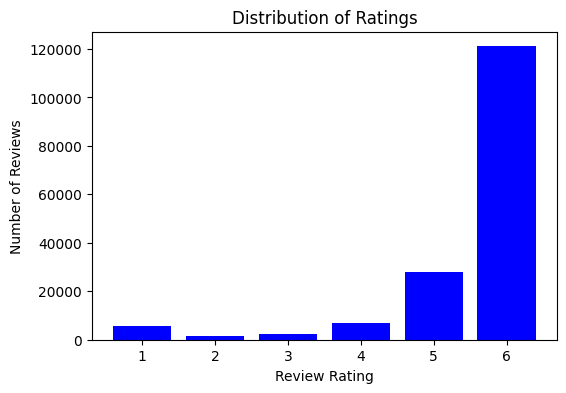

In [35]:
# Number of reviews per each review rating
reviews_per_rating = metadata_train_merged['rating'].value_counts().sort_index().head(10)

plt.figure(figsize=(6,4))
plt.bar(reviews_per_rating.index, reviews_per_rating.values, color = 'blue')
plt.title('Distribution of Ratings')
plt.xlabel("Review Rating")
plt.ylabel("Number of Reviews")
plt.xticks(reviews_per_rating.index)

plt.show()

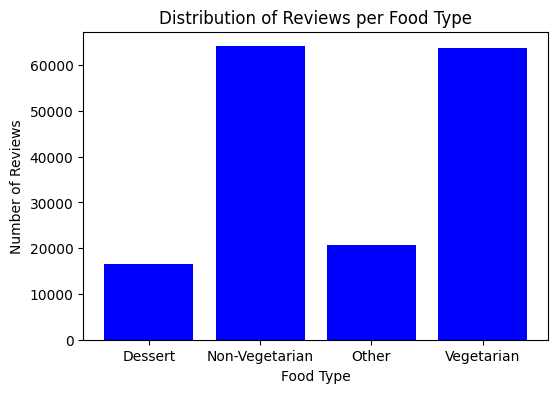

In [36]:
# Number of reviews per food type
reviews_per_foodtype = metadata_train_merged['food_type'].value_counts().sort_index().head(10)

plt.figure(figsize=(6,4))
plt.bar(reviews_per_foodtype.index, reviews_per_foodtype.values, color = 'blue')
plt.title('Distribution of Reviews per Food Type')
plt.xlabel("Food Type")
plt.ylabel("Number of Reviews")
plt.xticks(reviews_per_foodtype.index)

plt.show()

In [37]:
# Check top 10 best reviews in terms of rating and number of reviews 
metadata_train_merged[['recipe_id', 'name', 'rating']].groupby(['recipe_id', 'name'])['rating'].agg(['mean','count'])\
.rename(columns={"mean": "avg_rating", "count": "nb_reviews"}).round(0).sort_values(by = ['avg_rating','nb_reviews'], ascending= False).head(n=10)

avg_rating  \
recipe_id name                                                           
R9057945  my family s favorite sloppy joes  pizza joes             6.0   
R4773392  yes  virginia there is a great meatloaf                  6.0   
R1441991  banana banana bread                                      6.0   
R9318623  southern buttermilk biscuits                             6.0   
R7577428  crock pot whole chicken                                  6.0   
R5580730  beef patties in onion gravy                              6.0   
R7108475  best ever banana cake with cream cheese frosting         6.0   
R6455918  panera s cream cheese potato soup                        6.0   
R5363074  greek potatoes  oven roasted and delicious               6.0   
R4346204  simply sour cream chicken enchiladas                     6.0   

                                                            nb_reviews  
recipe_id name                                                          
R9057945  my family s favorite sloppy joes  pizza joes             364  
R4773392  yes  virginia there is a great meatloaf                  292  
R1441991  banana banana bread                                      271  
R9318623  southern buttermilk biscuits                             237  
R7577428  crock pot whole chicken                                  213  
R5580730  beef patties in onion gravy                              211  
R7108475  best ever banana cake with cream cheese frosting         211  
R6455918  panera s cream cheese potato soup                        208  
R5363074  greek potatoes  oven roasted and delicious               201  
R4346204  simply sour cream chicken enchiladas                     199

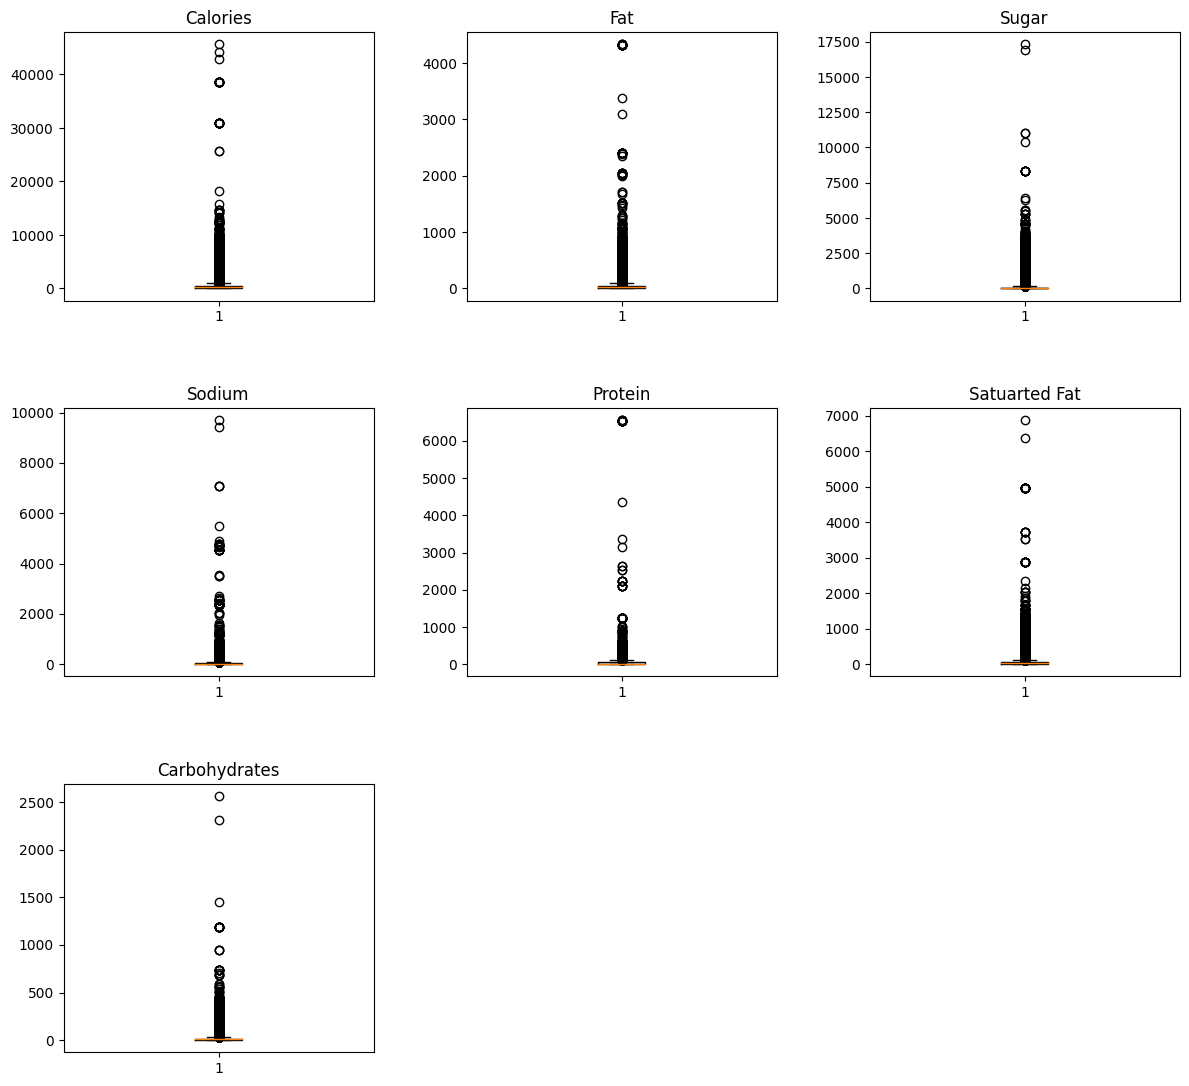

In [38]:
#  Plot a subplot with box plots to detect outliers

# Create subplots with two rows and one column
fig, axs = plt.subplots(3, 3,figsize=(12,12))

# Boxplot for calories
axs[0, 0].boxplot(metadata_train_merged["calories"])
axs[0, 0].set_title('Calories')

# Boxplot for fat
axs[0, 1].boxplot(metadata_train_merged["fat"])
axs[0, 1].set_title('Fat')

# Boxplot for sugar
axs[0, 2].boxplot(metadata_train_merged["sugar"])
axs[0, 2].set_title('Sugar')

# Boxplot for sodium
axs[1, 0].boxplot(metadata_train_merged["sodium"])
axs[1, 0].set_title('Sodium')

# Boxplot for protein
axs[1, 1].boxplot(metadata_train_merged["protein"])
axs[1, 1].set_title('Protein')

# Boxplot for saturated fat
axs[1, 2].boxplot(metadata_train_merged["saturated fat"])
axs[1, 2].set_title('Satuarted Fat')

# Boxplot for carbohydrates
axs[2, 0].boxplot(metadata_train_merged["carbohydrates"])
axs[2, 0].set_title('Carbohydrates')

# Hide empty subplots in the third row
axs[2, 1].set_visible(False)
axs[2, 2].set_visible(False)

fig.subplots_adjust(left=0.05, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()


In [39]:
# From above plots we can see that there are ouliers in all the numerical columsn related to nutritional values. We will furhter check the skewness of 
# these nutritional values columns 

In [40]:
# Skewness of numerical varibles relate to nutritional values 
metadata_train_merged[num_vars].skew()

calories         21.482395
fat              25.384098
sugar            14.982834
sodium           35.946091
protein          50.487812
saturated fat    21.413690
carbohydrates    16.579799
dtype: float64

For a normal distribution, skewness should be in the range of -1 to 1 but here these values are out of range.  This confirms the presence of outliers in data So, we will proceed with replacing these outliers.

In [41]:
# Replace outliers using InterQuantile Range(IQR) and replace them with median

# Calculate median for each column
medians_num_vars = metadata_train_merged[num_vars].median()

# Calculate the interquartile range (IQR) for each column
q1 = metadata_train_merged[num_vars].quantile(0.25)
q3 = metadata_train_merged[num_vars].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds for outliers
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Replace outliers with median
metadata_train_merged[num_vars] = np.where(metadata_train_merged[num_vars] > upper_limit, medians_num_vars, metadata_train_merged[num_vars])
metadata_train_merged[num_vars] = np.where(metadata_train_merged[num_vars] < lower_limit, medians_num_vars, metadata_train_merged[num_vars])

In [42]:
# We will check the skewness again to verify the presence of outliers
metadata_train_merged[num_vars].skew()

calories         0.889815
fat              1.070974
sugar            1.616554
sodium           1.133218
protein          1.100653
saturated fat    1.171830
carbohydrates    0.973094
dtype: float64

We can see drastic fall in the skewness Of course, some of variables still exhibit presence of outliers (becasue their values are not in range of -1,1. Yet this is an improvement 

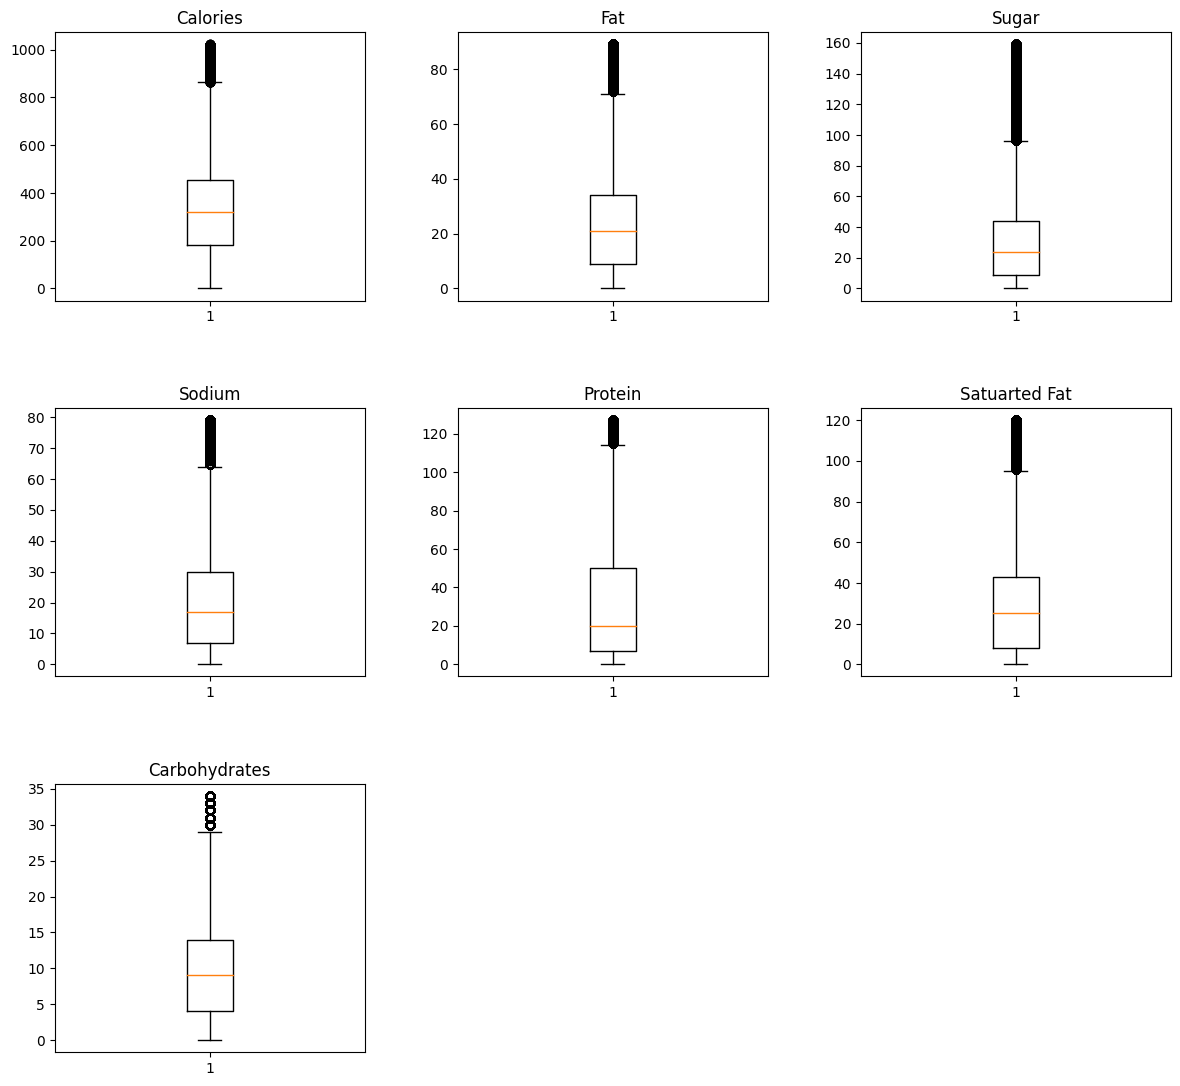

In [43]:
# Plot box plots again to check the distribution of values

# Create subplots with two rows and one column
fig, axs = plt.subplots(3, 3,figsize=(12,12))

# Boxplot for calories
axs[0, 0].boxplot(metadata_train_merged["calories"])
axs[0, 0].set_title('Calories')

# Boxplot for fat
axs[0, 1].boxplot(metadata_train_merged["fat"])
axs[0, 1].set_title('Fat')

# Boxplot for sugar
axs[0, 2].boxplot(metadata_train_merged["sugar"])
axs[0, 2].set_title('Sugar')

# Boxplot for sodium
axs[1, 0].boxplot(metadata_train_merged["sodium"])
axs[1, 0].set_title('Sodium')

# Boxplot for protein
axs[1, 1].boxplot(metadata_train_merged["protein"])
axs[1, 1].set_title('Protein')

# Boxplot for saturated fat
axs[1, 2].boxplot(metadata_train_merged["saturated fat"])
axs[1, 2].set_title('Satuarted Fat')

# Boxplot for carbohydrates
axs[2, 0].boxplot(metadata_train_merged["carbohydrates"])
axs[2, 0].set_title('Carbohydrates')

# Hide empty subplots in the third row
axs[2, 1].set_visible(False)
axs[2, 2].set_visible(False)

fig.subplots_adjust(left=0.05, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

In [44]:
# Descriptive statistics of the 'calories' column
metadata_train_merged['calories'].describe()

count    165226.000000
mean        341.260762
std         210.242317
min           0.000000
25%         182.100000
50%         320.900000
75%         455.200000
max        1021.500000
Name: calories, dtype: float64

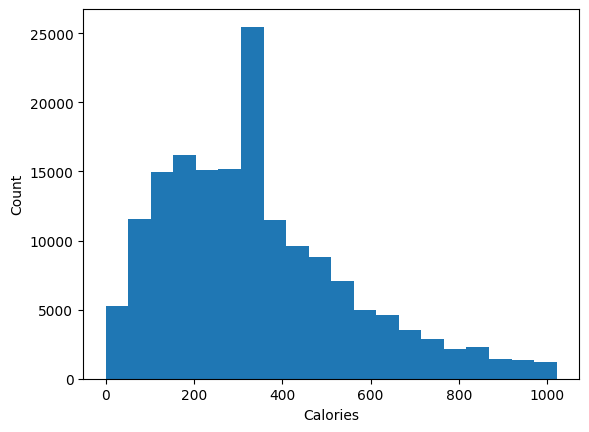

In [45]:
# plot a histogram of calorie distribution
plt.hist(metadata_train_merged['calories'], bins=20)
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

From the descriptives and histogram of calories, we will classify recepies into three categories 
*   Mostly Healthy, if number of calories are less than 300
*   Healthy, if number of calories are less than 500
*   Unhealthy, if number of calories are greater than 500







In [46]:
# Define a fucntion to classify recipies 
def classify_recipes(calories):
    if calories <= 300:
        return 'Mostly healthy'
    elif calories <= 500:
        return 'Healthy'
    else:
        return 'Unhealthy'

In [47]:
# Apply above funtction on dataset 
metadata_train_merged['recipes_classification'] = metadata_train_merged['calories'].apply(classify_recipes)

In [48]:
# Check number of unique recipies per each recipe classification
metadata_train_merged.groupby('recipes_classification')['recipe_id'].nunique()

recipes_classification
Healthy           20583
Mostly healthy    29369
Unhealthy         12565
Name: recipe_id, dtype: int64

In [49]:
# Check top 30 ingredient used in recepies. In order to do this, converting  ingredients to a list 
ingredients_inlist = metadata_train_merged['ingredients'].tolist()
ingredients_inlist

# Split ingredients into words
top_freq_ingredients = []
for ingredient in ingredients_inlist:
    top_freq_ingredients.extend(ingredient.split())

# Count the occurrence of each word in spam emails
ingredients_counts = Counter(top_freq_ingredients)

# Find the top 30 most frequently ingredients
ingredients_top30 = pd.DataFrame(ingredients_counts.most_common(30),columns=['ingredients used', 'Frequency'])
ingredients_top30

ingredients used  Frequency
0             salt,      76844
1            sugar,      67787
2           pepper,      63349
3           butter,      49601
4              oil,      48876
5            ground      46668
6             fresh      45660
7            flour,      45461
8           cheese,      44840
9           powder,      41267
10           garlic      39426
11           onion,      39353
12          chicken      33155
13           sauce,      32775
14           baking      30918
15           water,      29363
16            black      28185
17            milk,      27640
18            eggs,      26656
19            olive      25256
20           pepper      23999
21            dried      23840
22            brown      23824
23              red      23538
24            green      21764
25             salt      21517
26            cream      21516
27            white      19459
28           juice,      18972
29          cloves,      18896

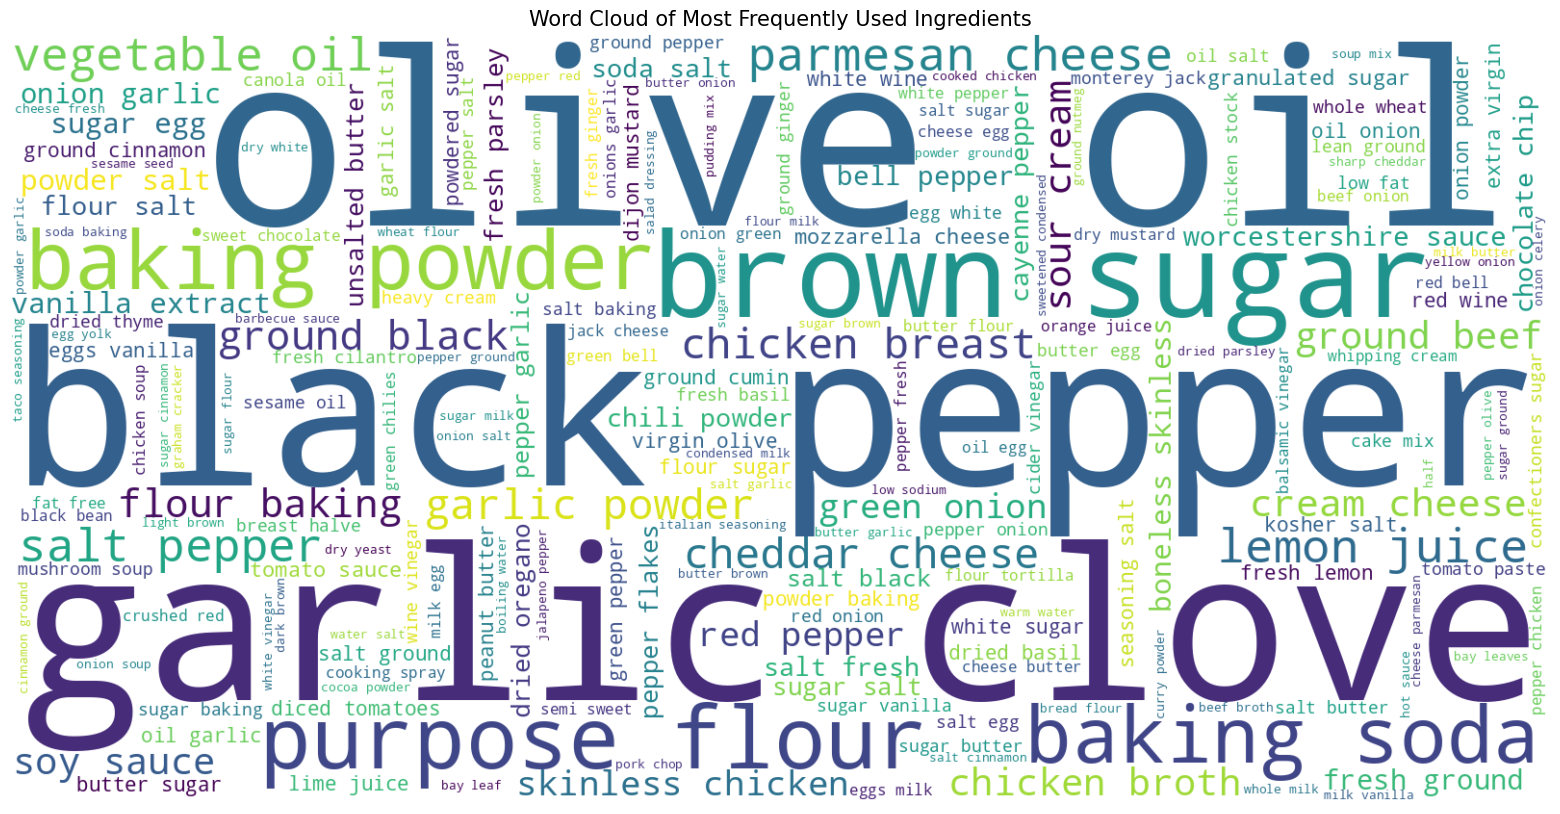

In [50]:
# Now we will plot a word cloud of ingredients

# Combine all ingredients into a single string
ingredients = ' '.join(metadata_train_merged['ingredients'])

# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(ingredients)

# Display the generated image
plt.figure(figsize=(20,10))
plt.title('Word Cloud of Most Frequently Used Ingredients', fontsize = 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

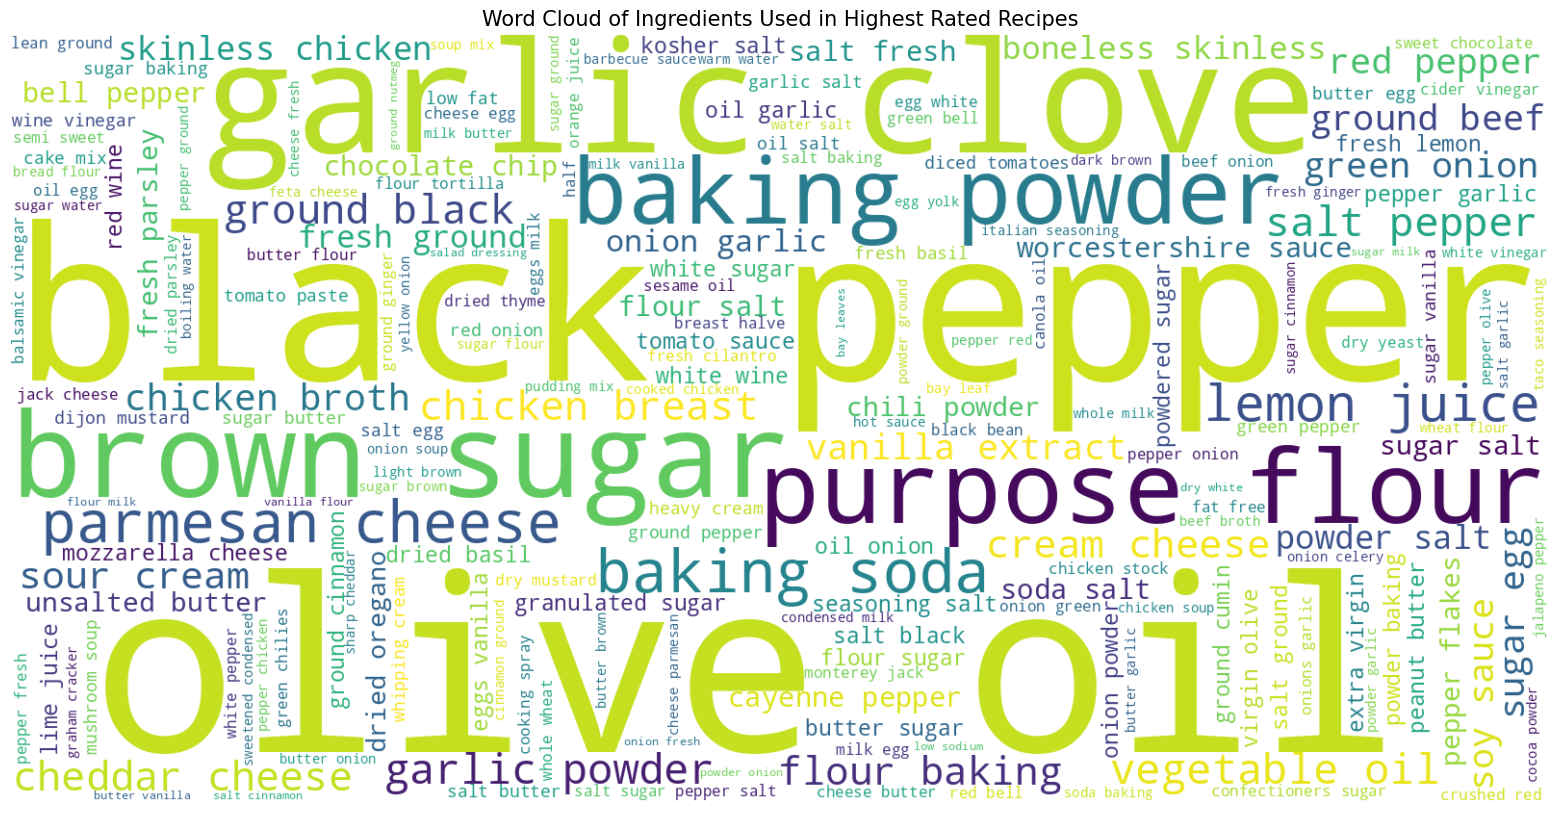

In [51]:
# Word cloud of ingredients used in highest rated recipes 

# Combine all ingredients into a single string
ingredients_high_rating = ' '.join(metadata_train_merged[metadata_train_merged['rating'] == 6.0]['ingredients'])

# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(ingredients_high_rating)

# Display the generated image
plt.figure(figsize=(20,10))
plt.title('Word Cloud of Ingredients Used in Highest Rated Recipes', fontsize = 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

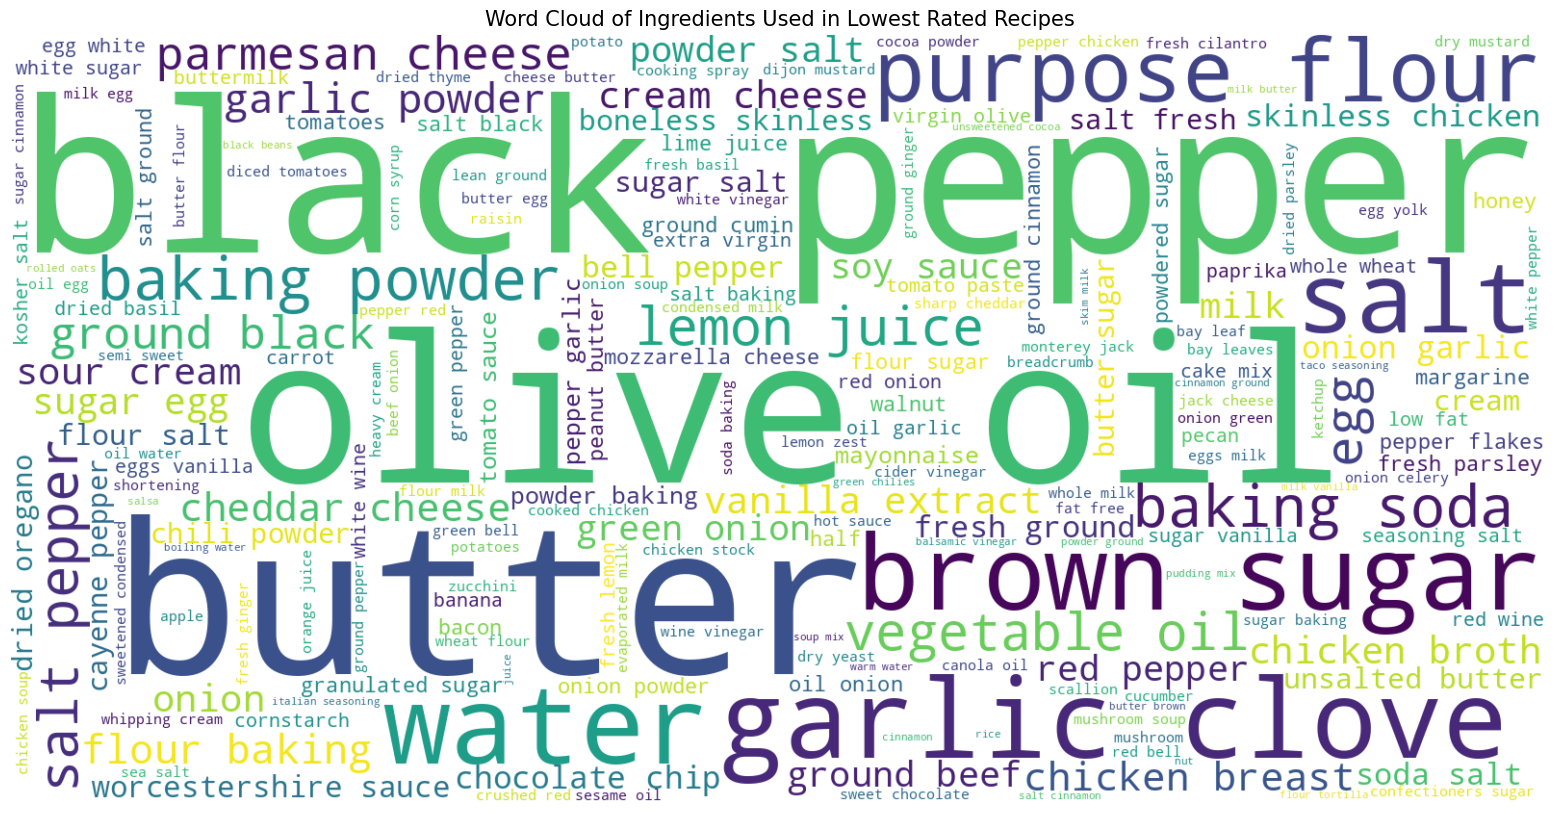

In [52]:
# Word cloud of ingredients used in lowest rated recipes 

# Combine all ingredients into a single string
ingredients_lowest_rating = ' '.join(metadata_train_merged[metadata_train_merged['rating'] == 1.0]['ingredients'])

# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(ingredients_lowest_rating)

# Display the generated image
plt.figure(figsize=(20,10))
plt.title('Word Cloud of Ingredients Used in Lowest Rated Recipes', fontsize = 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

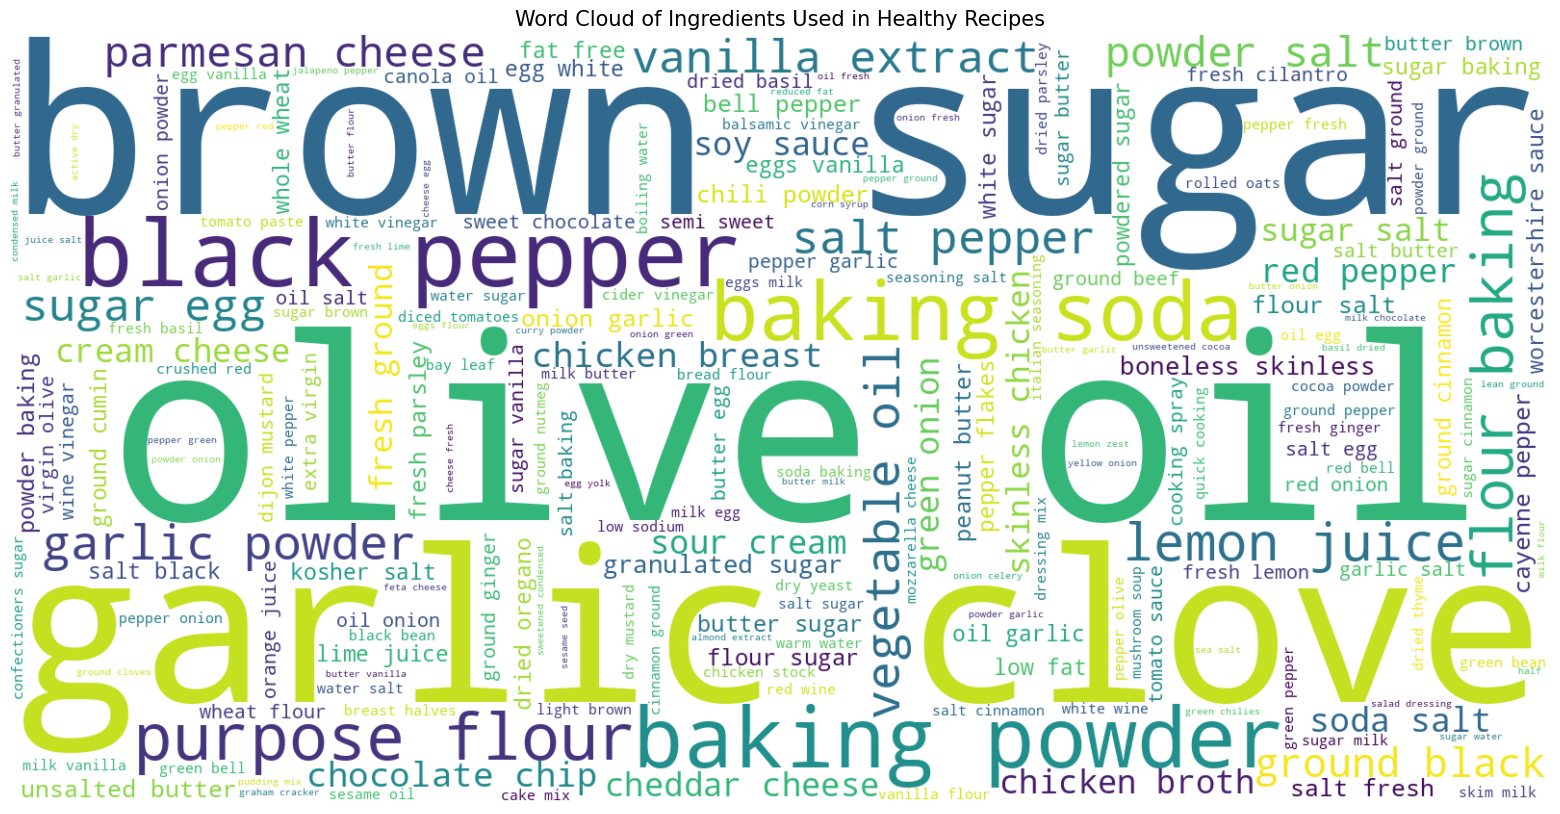

In [53]:
# Word cloud of ingredients used in Most healthy recipes 

# Combine all ingredients into a single string
ingredients_healthy = ' '.join(metadata_train_merged[metadata_train_merged['recipes_classification'] == 'Mostly healthy']['ingredients'])

# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(ingredients_healthy)

# Display the generated image
plt.figure(figsize=(20,10))
plt.title('Word Cloud of Ingredients Used in Healthy Recipes', fontsize = 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

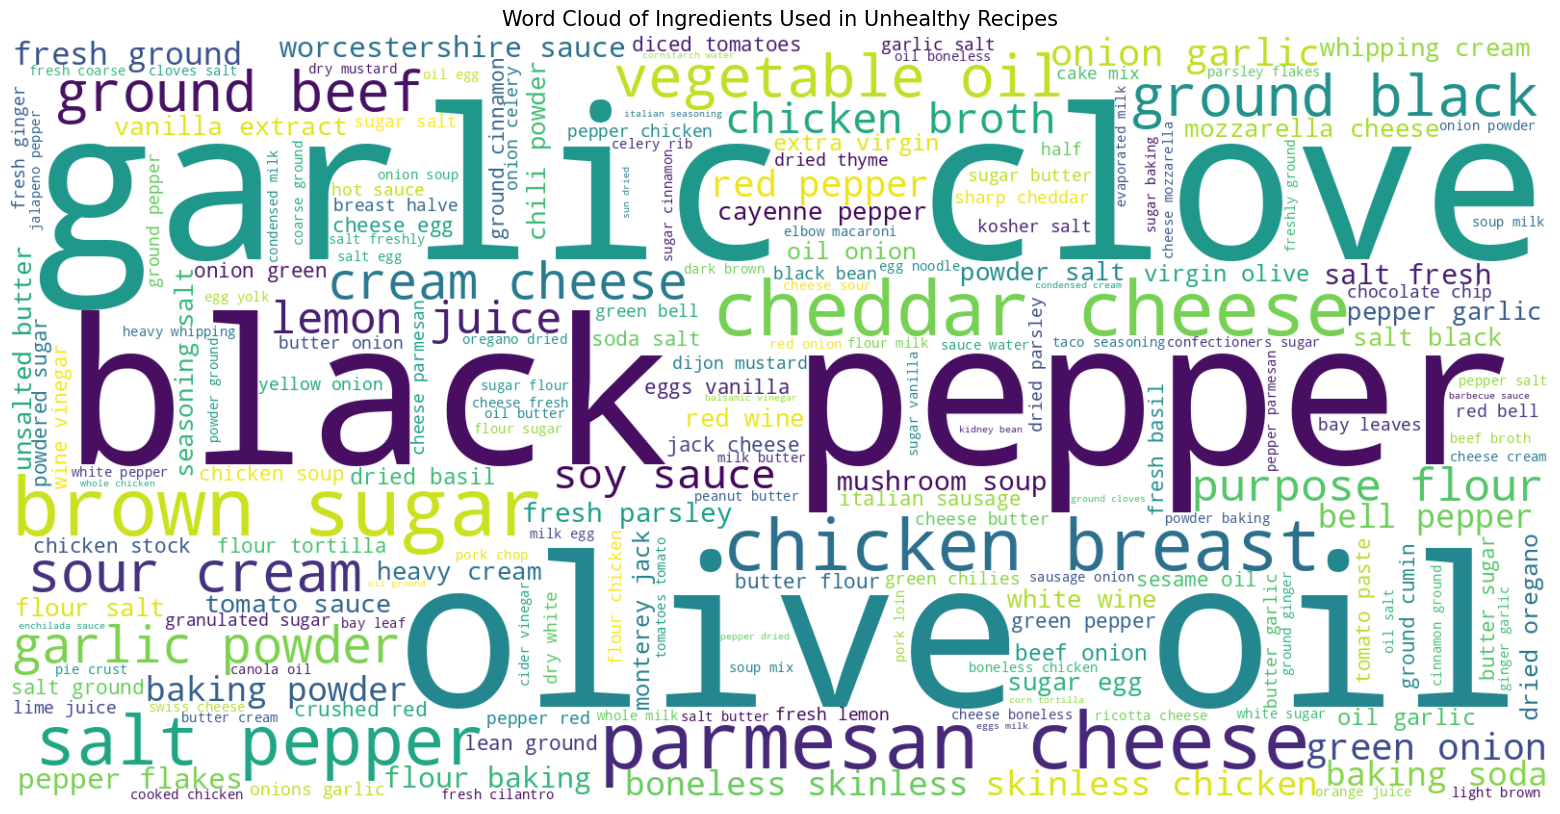

In [54]:
# Word cloud of ingredients used in Most unhealthy recipes 

# Combine all ingredients into a single string
ingredients_unhealthy = ' '.join(metadata_train_merged[metadata_train_merged['recipes_classification'] == 'Unhealthy']['ingredients'])

# Generate a word cloud image
wordcloud_unhealthy = WordCloud(width=1600, height=800, background_color="white").generate(ingredients_unhealthy)

# Display the generated image
plt.figure(figsize=(20,10))
plt.title('Word Cloud of Ingredients Used in Unhealthy Recipes', fontsize = 15)
plt.imshow(wordcloud_unhealthy, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
# Copy contents of metadata_train_merged to a new dataframe
recsys_df = metadata_train_merged.copy()

#**User and Recipes filter for recommendations**



In [56]:
recsys_df.columns

Index(['name', 'recipe_id', 'ingredients', 'n_ingredients', 'calories', 'fat',
       'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates',
       'user_id', 'rating', 'review', 'food_type', 'recipes_classification'],
      dtype='object')

In [57]:
# Number of recipes reviewed by customer and average rating provided by each customer
users_history = recsys_df.groupby('user_id').agg(num_reviews=('rating', 'count'), avg_rating=('rating', 'mean')).round(0).sort_values(by = ['num_reviews'], ascending= False)

# List of the recipes reviewed by that user
recipes_reviewed = recsys_df.groupby('user_id')['recipe_id'].apply(list).reset_index()

# Merge the recipes_reviewed dataframe with users_history
users_history = pd.merge(users_history, recipes_reviewed, on='user_id')

# Convert the list of recipe titles to a comma-separated string
users_history.rename(columns={'recipe_id': 'recipes_reviewed'}, inplace=True)
# users_history['recipes_reviewed'] = users_history['recipe_id'].apply(lambda x: ','.join(x))

users_history.head(5)

user_id  num_reviews  avg_rating  \
0  U5565883           16         6.0   
1   U619416           16         6.0   
2  U6227703           16         6.0   
3  U6225460           16         6.0   
4  U6224885           16         6.0   

                                                                                                                                                   recipes_reviewed  
0  [R7074616, R6848792, R8643947, R3873314, R2842367, R5473202, R7903128, R6510502, R3284823, R3323626, R1201739, R7477463, R4610379, R2370068, R4588540, R5859382]  
1   [R5068295, R6122211, R1265895, R6956741, R5335395, R7728358, R9999255, R7124669, R6303622, R4824952, R982967, R2885079, R5050572, R3128823, R5725198, R5849064]  
2    [R4853532, R8414662, R4680274, R5580730, R1424207, R480782, R5255636, R6505716, R6258837, R6769244, R9172736, R5881639, R286416, R4501734, R4258195, R2843617]  
3   [R9735701, R1255256, R6824133, R1408105, R4189740, R3783005, R5268105, R2215166, R4572405, R8155434, R6363488, R4337286, R515238, R7309843, R6969287, R3035555]  
4   [R1979249, R169493, R1703850, R1969740, R3791890, R1133420, R9077843, R3744231, R8632317, R7644002, R6590534, R2254672, R7937879, R8666073, R9179598, R8882500]

In [58]:
# Filter and extract users with greater than or equal to 10 number of reviews and convert the result to a list
users_history_filter = users_history[users_history['num_reviews'] >= 10]['user_id'].tolist()

In [59]:
# Now, further filter the main data frame with the result obtained from above
recsys_filter = recsys_df[recsys_df['user_id'].isin(users_history_filter)]

In [60]:
recsys_filter_pivot = recsys_filter.pivot_table(index='user_id', values='rating', columns='recipe_id')
recsys_filter_pivot.head(2)

recipe_id  R1000154  R100092  R1001154  R1001286  R100130  R1001307  R1001756  \
user_id                                                                         
U1000319        NaN      NaN       NaN       NaN      NaN       NaN       NaN   
U1000594        NaN      NaN       NaN       NaN      NaN       NaN       NaN   

recipe_id  R1001849  R1002020  R1002089  ...  R999840  R9998534  R9998918  \
user_id                                  ...                                
U1000319        NaN       NaN       NaN  ...      NaN       NaN       NaN   
U1000594        NaN       NaN       NaN  ...      NaN       NaN       NaN   

recipe_id  R9998938  R9999255  R9999260  R999941  R9999431  R9999667  R9999748  
user_id                                                                         
U1000319        NaN       NaN       NaN      NaN       NaN       NaN       NaN  
U1000594        NaN       NaN       NaN      NaN       NaN       NaN       NaN  

[2 rows x 61946 columns]

In [61]:
# Calculate sparsity 
def calculate_sparsity(df):
    return 1 - df.count().sum() / (df.shape[0] * df.shape[1])

calculate_sparsity(recsys_filter_pivot)

0.999761298019947

In [62]:
recsys_filter_pivot.head(1)

recipe_id  R1000154  R100092  R1001154  R1001286  R100130  R1001307  R1001756  \
user_id                                                                         
U1000319        NaN      NaN       NaN       NaN      NaN       NaN       NaN   

recipe_id  R1001849  R1002020  R1002089  ...  R999840  R9998534  R9998918  \
user_id                                  ...                                
U1000319        NaN       NaN       NaN  ...      NaN       NaN       NaN   

recipe_id  R9998938  R9999255  R9999260  R999941  R9999431  R9999667  R9999748  
user_id                                                                         
U1000319        NaN       NaN       NaN      NaN       NaN       NaN       NaN  

[1 rows x 61946 columns]

In [63]:
# Split data into train and test sets
train, test = train_test_split(recsys_filter[['user_id','recipe_id','rating']], test_size=0.25)

In [64]:
# CHeck train and test data sets shape
print("Shape of training data set is", train.shape)
print("Shape of test data set is", test.shape)

Shape of training data set is (122455, 3)
Shape of test data set is (40819, 3)


In [65]:
# set up reader with min rating and max rating as arguments
reader = Reader(rating_scale=(1, 6))

# surprise training and test set
df_train = Dataset.load_from_df(train, reader).build_full_trainset()
df_test = list(test.itertuples(index=False, name=None))

##**Collaborative Filtering**

###**KNNBasic Algo(User Based)**

In [66]:
# Set dictionary of similarity options
sim_options = {'name': 'cosine',
               'user_based': True
               }

# Build KNNBasic algorithm, and train it to select 20 most similar users (min 5)
ub_knnbasic = KNNBasic(k=20, min_k=5, sim_options=sim_options, random_state=42)

# fit on training set
ub_knnbasic.fit(df_train)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [67]:
pred = ub_knnbasic.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 1.0957
Impossible: 0.9655


###**KNNBasic Algo(Item Based)**

In [68]:
# set option to cosine similarity and user-based collaborative filtering
# options = {'name':'pearson', 'user_based':False}

# sim_options_ib = {'name': 'pearson',
#                'user_based': False
#                }

# # Build KNNBasic algorithm, and train it to select 20 most similar items (min 5)
# ib = KNNBasic(k=20, min_k=5, sim_options=sim_options_ib, random_state=42)

# # fit on training set
# ib.fit(df_train)

In [69]:
# pred = ib.test(df_test)
# accuracy.rmse(pred)

# # percentage impossible predictions
# perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
# print(f"Impossible: {perc_impossible:.4f}")

In [70]:
# Tried creating KNNBasic algo with item based approached, unfortunately notebook crashed everytime this model was tried. So, for time being skipping this model

###**Alternating Least Squares (ALS)**

In [71]:
# Select alternating least squares (ALS) and 30 epochs
options = {"method": "als", "n_epochs": 250,"reg_u": 15, "reg_i": 20}
als = BaselineOnly(bsl_options=options)

# fit on training set
als.fit(df_train)

pred = als.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

Estimating biases using als...
RMSE: 1.0592
Impossible: 0.0000


###**SVD**

In [72]:
# select 20 factors and use probabilistic matrix factorization (with bias)
svd = SVD(n_factors=20, biased=True, random_state=1)

# fit on training set
svd.fit(df_train)

pred = svd.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 1.0599
Impossible: 0.0000


###**Stochastic Gradient Descent (SGD)**

In [73]:
# Select stochastic gradient descen (SGD) and 30 epochs
options = {"method": "sgd", "learning_rate": 0.00005, "n_epochs": 250,"reg": 0.02,}
sgd = BaselineOnly(bsl_options=options)

# fit on training set
sgd.fit(df_train)

pred = sgd.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

Estimating biases using sgd...
RMSE: 1.0783
Impossible: 0.0000


###**CoCLustering**

In [74]:
# Create co-clustering algo for 30 users and 10 items 
clust = CoClustering(n_cltr_u=30, n_cltr_i=20, n_epochs=25, random_state=42)

# Fit the model on train set
clust.fit(df_train)

pred = clust.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 1.2428
Impossible: 0.0000


In [75]:
# Define fucntion to predict users topN
def predict_user_topn(model, train, user, topk=15, item_col='item'):
    """
    Returns topk items for specified user.
    Return type: list

    Args[model, train, user, topk, item_col]
    model:      fitted model (surprise package)
    train:      train set used to fit model
    user:       user id
    topk:       topk items to return
    item_col:   column containing item ids 
    """

    # intermediate result dict 
    res = {item_col:[], 'pred':[], 'detail':[]}
    
    # iter through all items contained in train set
    for item in set(train[item_col]) :
        uid, iid, true_r, est, detail = model.predict(user,item)
        # if detail['was_impossible']: continue
        # save to result dict
        res[item_col].append(item)
        res['pred'].append(est)
        res['detail'].append(detail)

    return list(pd.DataFrame(res).sort_values('pred', ascending=False)[:topk][item_col])

In [76]:
# Top 10 recommendations for a user

user = "U2344011"
topk = 10
lookup_recipe = recsys_df.drop_duplicates(subset=["recipe_id"], keep="last").set_index("recipe_id")


res = {}
for model_name, model in dict(user_based=ub_knnbasic,als=als, svd=svd, sgd=sgd,coclustering=clust).items():
    pred = predict_user_topn(model, train, user=user, topk=topk, item_col="recipe_id")

    # get name for each of the predicted product ids
    pred_name = [lookup_recipe.loc[i]["name"] for i in pred]

    res[model_name] = pred_name

pd.DataFrame(res)


user_based  \
0                                      daisy mae s fried apples   
1                                         creamed tuna on toast   
2  apple coffee cake with crumble topping and brown sugar glaze   
3                                      lovely lemon bar cookies   
4                                healthy pumpkin banana muffins   
5                   perfectly fresh white bread  bread machines   
6                                    potato gratin with boursin   
7                                       better than sex cake ii   
8                                        starbucks frappuccinos   
9                                  aunt susie s dreamsicle cake   

                                                              als  \
0                   beth s melt in your mouth barbecue ribs  oven   
1                                     kittencal s famous coleslaw   
2                                        yummy baked potato skins   
3                                          crock pot apple butter   
4                                  chocolate covered strawberries   
5                                     chocolate mint candy  fudge   
6  tsr version of red lobster cheddar bay biscuits by todd wilbur   
7                                           the best banana bread   
8              warm roasted root vegetable and chicken salad  rsc   
9                                       texas red enchilada sauce   

                                                      svd  \
0                                yummy baked potato skins   
1           beth s melt in your mouth barbecue ribs  oven   
2  top secret recipes waffle house waffles by todd wilbur   
3                      mozzarella  tomato and basil salad   
4                   pasta puttanesca   the madame s pasta   
5               quick and easy crabby caesar salads  5fix   
6                                  monterey chicken rolls   
7                          chocolate covered strawberries   
8              baked beans don t get any better than this   
9          white chocolate chip and macadamia nut cookies   

                                             sgd  \
0                     creamy cajun chicken pasta   
1                               wholly guacamole   
2  beth s melt in your mouth barbecue ribs  oven   
3                          the best banana bread   
4                               queso blanco dip   
5               jo mama s world famous spaghetti   
6                         crock pot apple butter   
7                    kittencal s famous coleslaw   
8              panera s cream cheese potato soup   
9                    tomato and basil bruschetta   

                                                       coclustering  
0                          cannellini beans with crushed red pepper  
1                                               pretend  cheesecake  
2                                             queso beef enchiladas  
3                                                meatloaf tropicale  
4                                              matzo toffee brittle  
5                                                three pepper pizza  
6  streuselkuchen topped w  fresh fig or peach  plum  bread machine  
7                                       peach and raspberry cobbler  
8                                           tuna salad jumbo shells  
9                                              momma s potato salad

In [77]:
# Check the performance of all the collaborative filtering models 
models = {"user_based":ub_knnbasic,"als":als, "svd":svd, "sgd":sgd,"coclustering":clust}
overview = pd.concat([eval.evaluate(mod.test(df_test), topn=5, rating_cutoff=5) for mod in models.values()], axis=1)
overview.columns = list(models.keys())
overview

user_based       als       svd       sgd  coclustering
RMSE         1.095655  1.059189  1.059899  1.078299      1.242789
MAE          0.729025  0.676341  0.655359  0.708781      0.688412
Recall       0.997769  0.984085  0.944337  0.999864      0.921648
Precision    0.900530  0.906476  0.912007  0.900784      0.907890
F1           0.946659  0.943687  0.927891  0.947742      0.914717
NDCG@5       0.917790  0.844296  0.842899  0.844320      0.856519

In [78]:
 kg_sub = kg_sub.rename(columns={"rating":"recipe_id",
                                 "id":"user_id"})

In [79]:
#  kg_sub = kg_sub.rename(columns={"id":"user_id"})

In [80]:
# surprise set for holdout data
df_sub = list(kg_sub.itertuples(index=False, name=None))

In [81]:
# Among all models,  ALS model performed well. So, fitting holdout data on this model
pred_holdout = als.test(df_sub)
accuracy.rmse(pred_holdout)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred_holdout if i.details["was_impossible"]]) / len(pred_holdout)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 2.5146
Impossible: 0.0000


In [87]:
# Exporting predictions to a dataframe                                                                                                                                                                                              pred_k2 = [(p.uid, p.iid, p.r_ui, p.est) for p in kag_preds]
pred_cols = ['uid', 'iid', 'r_ui', 'est', 'details']
kg_pred = pd.DataFrame(pred_holdout, columns=pred_cols)


# kagg_sub2['rating']=kag_preds1['est']                                                                                                                                                                                         kagg_sub2['id'] = kagg_sub2.apply(lambda x: x['user'] + '_' + x['item'], axis=1)                                                                                                                             kagg_sub2=kagg_sub2[['id','rating']]
# kagg_sub2.head()                                                                                                                                                                                                                          # Move to csv to save results, when sharing the file
# kagg_sub2.to_csv(r"Kaggle_predictions_02.csv", index=False)

In [90]:
# Dropping 'details' column
kg_pred = kg_pred.drop(['details'],axis=1)

uid       iid  r_ui       est
0     U4203696  R5764788     3  5.460126
1     U3421458  R8813647     3  5.503058
2     U9597064  R2792607     3  5.670555
3     U7843855  R1753610     3  5.516752
4     U9501971  R7200358     3  5.447700
...        ...       ...   ...       ...
7160  U6851872  R5889796     3  5.706786
7161  U2805154  R8199809     3  5.536097
7162  U9628413  R9775851     3  5.523626
7163  U7822462  R8689106     3  5.520069
7164  U9794154   R340842     3  5.503058

[7165 rows x 4 columns]

In [91]:
# Rename columns
kg_pred= kg_pred.rename(columns=
               {"uid": "User_id",
                "iid": "recipe_id",
                "r_ui": "rating",
                "est": "estimated_rating"})

In [92]:
# Concatenate 'user_id' and 'recipe_id', then export file as CSV
kg_pred['id'] = kg_pred['User_id'].astype(str) + '_' +  kg_pred['recipe_id'].astype(str)

In [94]:
kg_pred = kg_pred.drop(['rating'],axis=1)

In [97]:
kg_pred= kg_pred.rename(columns=
               {"estimated_rating": "rating"})

In [98]:
kg_pred

User_id recipe_id    rating                    details  \
0     U4203696  R5764788  5.460126  {'was_impossible': False}   
1     U3421458  R8813647  5.503058  {'was_impossible': False}   
2     U9597064  R2792607  5.670555  {'was_impossible': False}   
3     U7843855  R1753610  5.516752  {'was_impossible': False}   
4     U9501971  R7200358  5.447700  {'was_impossible': False}   
...        ...       ...       ...                        ...   
7160  U6851872  R5889796  5.706786  {'was_impossible': False}   
7161  U2805154  R8199809  5.536097  {'was_impossible': False}   
7162  U9628413  R9775851  5.523626  {'was_impossible': False}   
7163  U7822462  R8689106  5.520069  {'was_impossible': False}   
7164  U9794154   R340842  5.503058  {'was_impossible': False}   

                     id  
0     U4203696_R5764788  
1     U3421458_R8813647  
2     U9597064_R2792607  
3     U7843855_R1753610  
4     U9501971_R7200358  
...                 ...  
7160  U6851872_R5889796  
7161  U2805154_R8199809  
7162  U9628413_R9775851  
7163  U7822462_R8689106  
7164   U9794154_R340842  

[7165 rows x 5 columns]

In [101]:
kg_pred[['id','rating']].to_csv("submission_als.csv",  index=False)

##**Content Filtering**

In [102]:
# Notebook crashed multiple times while working on content filtering. So, in order to improve computational efficiency working on a subset of data

# Randomly select 10% of rows
recsys_filter_frac = recsys_filter.sample(frac=0.1, random_state=42)

In [103]:
recsys_filter_frac_pivot = recsys_filter_frac.pivot_table(index='user_id', values='rating', columns='recipe_id')
recsys_filter_frac_pivot
recsys_filter_frac_pivot.head(2)

recipe_id  R1001154  R100130  R1002020  R1002956  R1004942  R1005281  \
user_id                                                                
U1000594        NaN      NaN       NaN       NaN       NaN       NaN   
U1000606        NaN      NaN       NaN       NaN       NaN       NaN   

recipe_id  R1005564  R1005998  R1006245  R1006846  ...  R9992934  R999305  \
user_id                                            ...                      
U1000594        NaN       NaN       NaN       NaN  ...       NaN      NaN   
U1000606        NaN       NaN       NaN       NaN  ...       NaN      NaN   

recipe_id  R9993731  R9993803  R9994285  R9994315  R9995199  R9996451  \
user_id                                                                 
U1000594        NaN       NaN       NaN       NaN       NaN       NaN   
U1000606        NaN       NaN       NaN       NaN       NaN       NaN   

recipe_id  R9996734  R9999255  
user_id                        
U1000594        NaN       NaN  
U1000606        NaN       NaN  

[2 rows x 11507 columns]

In [104]:
# CHeck sparsity of this matrix
calculate_sparsity(recsys_filter_frac_pivot)

0.9998366480005634

In [105]:
# We will use sparse matrix 'recsys_filter_pivot' for content filtering. Trasnforming this matrix 
recsys_filter_frac_pivot = recsys_filter_frac_pivot.T
recsys_filter_frac_pivot.head(2)

user_id    U1000594  U1000606  U100072  U1002250  U100306  U1003084  U1003990  \
recipe_id                                                                       
R1001154        NaN       NaN      NaN       NaN      NaN       NaN       NaN   
R100130         NaN       NaN      NaN       NaN      NaN       NaN       NaN   

user_id    U1004009  U1004809  U1005332  ...  U9988109  U9988279  U9988612  \
recipe_id                                ...                                 
R1001154        NaN       NaN       NaN  ...       NaN       NaN       NaN   
R100130         NaN       NaN       NaN  ...       NaN       NaN       NaN   

user_id    U9988795  U9989002  U9991406  U9993812  U9994145  U9994866  \
recipe_id                                                               
R1001154        NaN       NaN       NaN       NaN       NaN       NaN   
R100130         NaN       NaN       NaN       NaN       NaN       NaN   

user_id    U9995229  
recipe_id            
R1001154        NaN  
R100130         NaN  

[2 rows x 8686 columns]

In [106]:
# Create a train-test split for above matrix
ct_train, ct_test = train_test_split(recsys_filter_frac[['user_id','recipe_id','rating']], test_size=0.28, random_state=42)

# reset index
# ct_train = ct_train.T
# ct_test = ct_test.T

# CHeck train and test data sets shape
print("Shape of content training data set is", ct_train.shape)
print("Shape of content test data set is", ct_test.shape)

Shape of content training data set is (11755, 3)
Shape of content test data set is (4572, 3)


In [107]:
ct_test

user_id recipe_id  rating
148479  U9336754  R8583868       6
68683   U7717238  R6063215       6
156888  U4705389  R5608905       6
105372  U7939476  R4111641       6
117027  U5379325  R5708701       6
...          ...       ...     ...
126318  U3337129  R6023812       6
60583   U7454808  R5419834       6
16213   U5777707  R3289524       6
154885  U8525042   R210232       6
19225   U5466979  R3268207       6

[4572 rows x 3 columns]

In [108]:
# Modify train set to use it to model 
train_stack = ct_train.stack().reset_index()
train_stack.columns = ['user_id', 'recipe_id', 'rating']
train_stack.head()

# Modify test set to use it to model 
test_stack = ct_test.stack().reset_index()
test_stack.columns = ['user_id', 'recipe_id', 'rating']

In [109]:
tokens1 = recsys_filter_frac['ingredients'].apply(lambda txt: [word.lower() for word in word_tokenize(str(txt)) if word.isalpha()])

In [110]:
# setup stop words list
stop_words = stopwords.words('english')
stop_words.append('nan')

stemmer = SnowballStemmer("english")

# remove stopwords
# stem
token_stem1 = tokens1.apply(lambda lst_token: [stemmer.stem(tok) for tok in lst_token if tok not in stop_words and len(tok) > 2])

In [111]:
# TFIDF vectorizer
tfidf = TfidfVectorizer(min_df=5)

# apply tf-idf vectorizer -> document-term-matrix in sparse format
dtm = tfidf.fit_transform([" ".join(x) for x in token_stem1])

print(dtm.shape)

df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names_out(), index=recsys_filter_frac['recipe_id'])

# Reset index to change df 
df_dtm = df_dtm.reset_index()

df_dtm = df_dtm.drop_duplicates(subset='recipe_id')

df_dtm = df_dtm.set_index('recipe_id')

print(df_dtm.shape)
df_dtm.head()

(16327, 1047)
(11507, 1047)


accent  acorn     activ   ad  adobo  agav  albacor  ale  alfredo  \
recipe_id                                                                     
R6959649      0.0    0.0  0.000000  0.0    0.0   0.0      0.0  0.0      0.0   
R3317896      0.0    0.0  0.000000  0.0    0.0   0.0      0.0  0.0      0.0   
R7894545      0.0    0.0  0.000000  0.0    0.0   0.0      0.0  0.0      0.0   
R9968619      0.0    0.0  0.434383  0.0    0.0   0.0      0.0  0.0      0.0   
R4448305      0.0    0.0  0.000000  0.0    0.0   0.0      0.0  0.0      0.0   

           allspic  ...     yeast  yellow  yoghurt  yogurt  yolk  york  yukon  \
recipe_id           ...                                                         
R6959649       0.0  ...  0.000000     0.0      0.0     0.0   0.0   0.0    0.0   
R3317896       0.0  ...  0.000000     0.0      0.0     0.0   0.0   0.0    0.0   
R7894545       0.0  ...  0.000000     0.0      0.0     0.0   0.0   0.0    0.0   
R9968619       0.0  ...  0.346316     0.0      0.0     0.0   0.0   0.0    0.0   
R4448305       0.0  ...  0.000000     0.0      0.0     0.0   0.0   0.0    0.0   

           zest  ziti  zucchini  
recipe_id                        
R6959649    0.0   0.0       0.0  
R3317896    0.0   0.0       0.0  
R7894545    0.0   0.0       0.0  
R9968619    0.0   0.0       0.0  
R4448305    0.0   0.0       0.0  

[5 rows x 1047 columns]

In [112]:
# WOrd frequncy in text preprocessed corpus 
from collections import Counter

res_l = []
for l in token_stem1: res_l+=l

token_dict = Counter(res_l)
token_dict = {k: v for k, v in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
pd.DataFrame(token_dict.items(), columns=['token', 'count'])[:10]

token  count
0    salt   9847
1  pepper   8957
2   sugar   7437
3   onion   6177
4   chees   5771
5  butter   5624
6  garlic   5513
7     oil   5482
8     egg   4923
9   flour   4901

In [113]:
# Prepare surprise train and test data 
reader = Reader(rating_scale=(1,6))
df_train_ct = Dataset.load_from_df(ct_train, reader).build_full_trainset()
df_test_ct = list(ct_test.itertuples(index=False, name=None))

In [114]:
from ieseg_recsys import *

In [115]:
# create a content-based recommender system 
content_based = model.ContentBased(NN=10)
content_based.fit(df_dtm)
content_based.fit_ratings(df_train_ct)

# predict test ratings
content_based_pred = content_based.test(df_test_ct)

In [116]:
accuracy.rmse(content_based_pred)

RMSE: 1.2620


1.2620296109364817

In [117]:
# # item-based
# options = {'name':'cosine', 'user_based':False}
# ib = KNNBasic(k=15, min_k=5, sim_options=options, random_state=42)
# ib.fit(df_train)

# # svd
# mf = SVD(n_factors=20, biased=False, random_state=42)
# mf.fit(df_train)

In [117]:
# Tried to run above model as well, but notebook crashed multiple times despite running model on a subset of data

#**References**

https://www.kaggle.com/competitions/whats-cooking 

https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893 

https://www.kaggle.com/code/wendykan/what-s-cooking-eda 

https://github.com/kbpavan/Text-Analytics-on-Food.com-Recipes-Review-Data- 




